In [ ]:
!pip install datasets transformers diffusers gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.6/436.6 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 k

1. Load and Explore Dataset

In [ ]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("mrtoy/mobile-ui-design")

print(dataset['train'].column_names)
print(dataset['train'][0])


['width', 'height', 'image', 'objects']
{'width': 375, 'height': 667, 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x667 at 0x7A8E1FE15120>, 'objects': {'bbox': [[0.0, 0.0, 375.0, 667.0], [0.0, 0.0, 375.0, 20.0], [0.0, 0.0, 375.0, 112.0], [0.0, 0.0, 375.0, 20.0], [8.0, 30.0, 349.0, 312.0], [212.0, 45.0, 88.0, 28.0], [134.0, 30.0, 108.0, 21.0], [335.0, 31.0, 22.0, 22.0], [29.0, 80.0, 317.0, 19.0], [17.0, 107.0, 98.0, 5.0], [8.0, 153.0, 153.0, 189.0], [8.0, 153.0, 153.0, 170.0], [52.0, 303.0282685512368, 103.0, 19.0], [50.0, 167.0, 111.0, 111.0], [94.25949367088606, 237.66525025719005, 36.53164556962027, 20.0], [73.18354430379759, 198.48937692892605, 74.46835443037975, 41.0], [60.5, 326.4487632508834, 65.5, 16.0], [198.0, 156.0, 145.0, 185.0], [198.0, 156.0, 145.0, 185.0], [217.5, 167.028880866426, 113.0, 111.0], [217.5, 167.028880866426, 113.0, 111.0], [255.12179487179492, 235.8523511401545, 38.37820512820508, 20.0], [250.8461538461538, 197.48375451263541, 79.653846

Displaying image 1


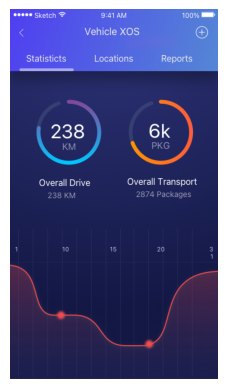

Displaying image 2


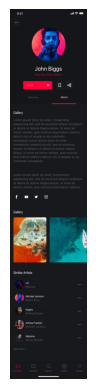

Displaying image 3


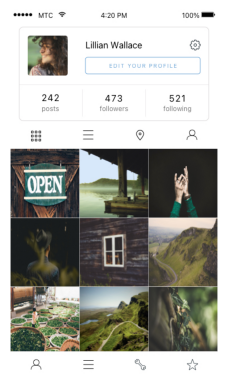

In [ ]:
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load the dataset
dataset = load_dataset("mrtoy/mobile-ui-design")

# Function to display the image
def display_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Display the first 3 images in the dataset
for i in range(3):
    img = dataset['train'][i]['image']
    print(f"Displaying image {i+1}")
    display_image(img)


2. Load Pre-trained models

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
from PIL import Image

# Load LLM for text generation (GPT-Neo)
model_name = "EleutherAI/gpt-neo-125M"
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load Stable Diffusion for image generation
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4").to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

3. Generate UI Design

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated text description: A clean mobile login page with a modern design

Menu

Menu

Menu

Menu

Menu

Menu

Menu

Menu

Menu

Menu

Menu

Menu

Menu




  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

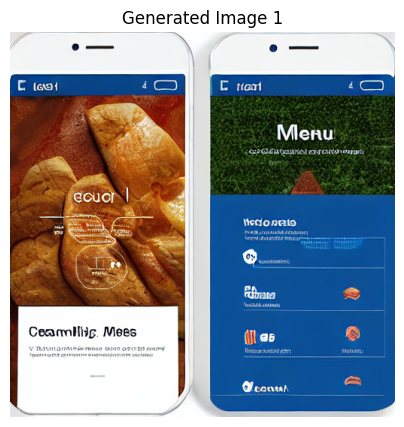

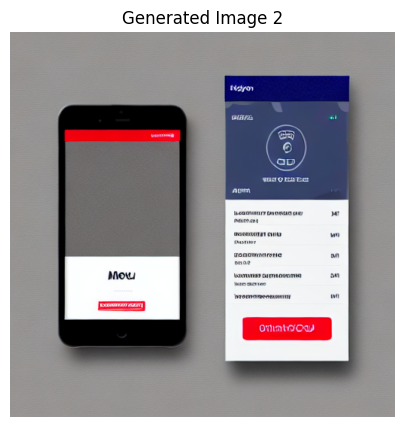

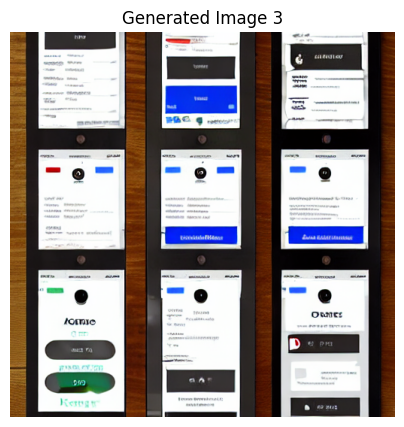

[<PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>]

In [ ]:
def generate_design(query, num_images=3, guidance_scale=7.5, num_inference_steps=50):
    # Using LLM to generate text based on input
    nlp_model = pipeline('text-generation', model=model_name)
    generated_text = nlp_model(query, max_length=50)[0]['generated_text']
    print("Generated text description:", generated_text)

    # Generate multiple images using the generated text with Stable Diffusion
    images = []
    for i in range(num_images):
        generated_image = pipe(generated_text, guidance_scale=guidance_scale, num_inference_steps=num_inference_steps).images[0]
        images.append(generated_image)

    # Display all the generated images
    for idx, img in enumerate(images):
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Generated Image {idx + 1}")
        plt.show()

    return images

# Example query with multiple images
generate_design("A clean mobile login page with a modern design", num_images=3, guidance_scale=8.5, num_inference_steps=75)

Gradio UI

In [ ]:
import gradio as gr

def generate_design(query):
    nlp_model = pipeline('text-generation', model=model_name)
    generated_text = nlp_model(query, max_length=50)[0]['generated_text']
    generated_image = pipe(generated_text).images[0]
    return generated_image

gr.Interface(fn=generate_design, inputs="text", outputs="image").launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c79b5514eb94a5882f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import torch
print(torch.cuda.is_available())


True
